In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

In [4]:
data=pd.read_csv("Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
# Creating a Copy of the Data Frame 
data1=data.copy()

In [6]:
# Remove the id column
data.drop('No', inplace=True, axis=1)
# No column is not usefull because we have index column 
# Rename the columns (remove X1..X2..X3.. and Y)
data.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
data.columns = data.columns.str.replace(' ','_')
data.head()

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
def basic_info(df):
    print(df.info(),'\n',df.describe(),'\n',df.isna().sum(),'\n',df.shape)
basic_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_date                     414 non-null    float64
 1   house_age                            414 non-null    float64
 2   distance_to_the_nearest_MRT_station  414 non-null    float64
 3   number_of_convenience_stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house_price_of_unit_area             414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
None 
        transaction_date   house_age  distance_to_the_nearest_MRT_station  \
count        414.000000  414.000000                           414.000000   
mean        2013.148971   17.712560                          1083.885689   
std            0

* We can see that there are <b>No Null values or NA values</b> in the data.
* All the data types are to the variables are right.
* We have <b>414 observations and 7 variables</b> in which 6 are independent and 1 dependent variables are there.
* <b>Indepedent Variable</b> : These are the study or explonatory Variables by which we try to predict the Value of Independent variable.
* <b>Dependent Variable</b> : Dependent variables are those variable which depends on the independent variables and we predict the values of future outcome by using the Model.

# Linear Regression
## Attributes(Features)
### Independent Features
* <b>Transaction Date</b> - when the transactions have completed  
* <b>House Age</b> - This is the age of the house which is a very important feature that how old the house is and how much more the life of the house will be.
* <b>Nearest to MRT Station</b> - Nearest to the MRT station will get costly because the convenience get better.
* <b>Convenience Stores</b> - Near the stores, the more life will get more convenient as incase of emergencies, the products will be available just a foot away
* <b>Latitude and Longitude</b>  - Location Of The House
### Dependent  Features
* <b>Price Of the House</b> - Price of the house per unit area

### Problem Statement 
We need to predict the price of the house per unit area by Using <b>Linear Regression</b> and the independent features.

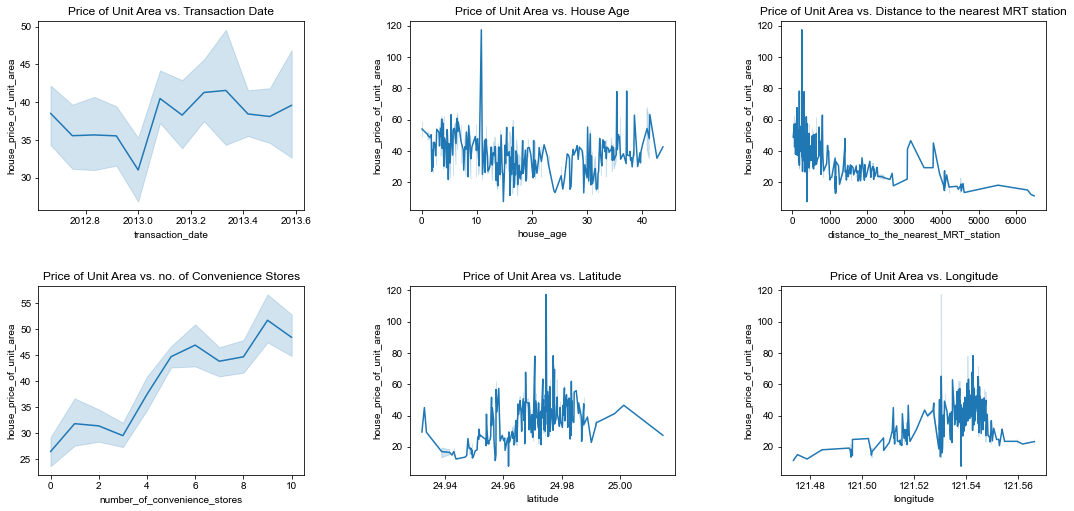

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=data, x="transaction_date", y="house_price_of_unit_area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.lineplot(data=data, x="house_age", y="house_price_of_unit_area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.lineplot(data=data, x="distance_to_the_nearest_MRT_station", y="house_price_of_unit_area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=data, x="number_of_convenience_stores", y="house_price_of_unit_area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.lineplot(data=data, x="latitude", y="house_price_of_unit_area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.lineplot(data=data, x="longitude", y="house_price_of_unit_area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

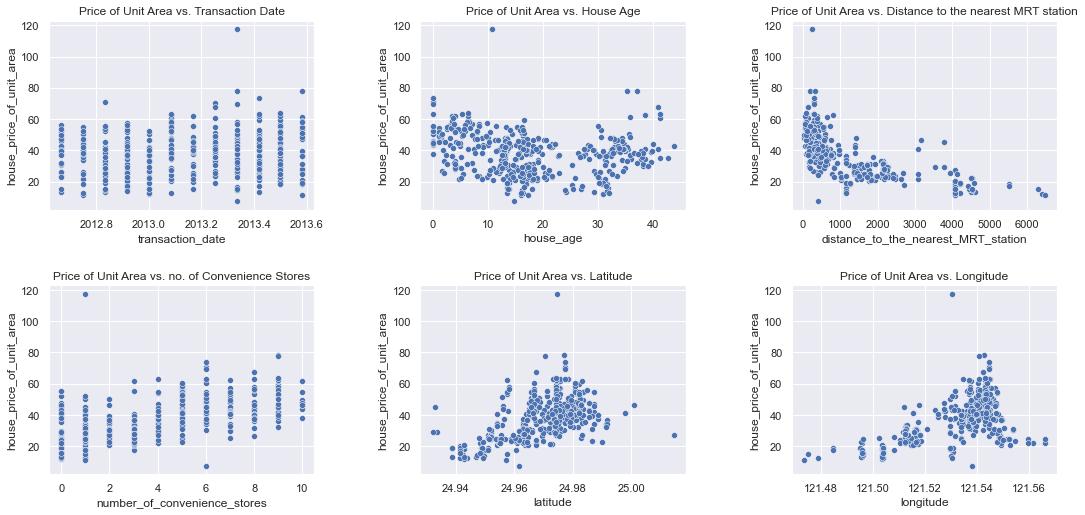

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.scatterplot(data=data, x="transaction_date", y="house_price_of_unit_area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. Transaction Date")

sns.scatterplot(data=data, x="house_age", y="house_price_of_unit_area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. House Age")

sns.scatterplot(data=data, x="distance_to_the_nearest_MRT_station", y="house_price_of_unit_area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.scatterplot(data=data, x="number_of_convenience_stores", y="house_price_of_unit_area", ax=ax[3])
ax[3].set_title("Price of Unit Area vs. no. of Convenience Stores")

sns.scatterplot(data=data, x="latitude", y="house_price_of_unit_area", ax=ax[4])
ax[4].set_title("Price of Unit Area vs. Latitude")

sns.scatterplot(data=data, x="longitude", y="house_price_of_unit_area", ax=ax[5])
ax[5].set_title("Price of Unit Area vs. Longitude")

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

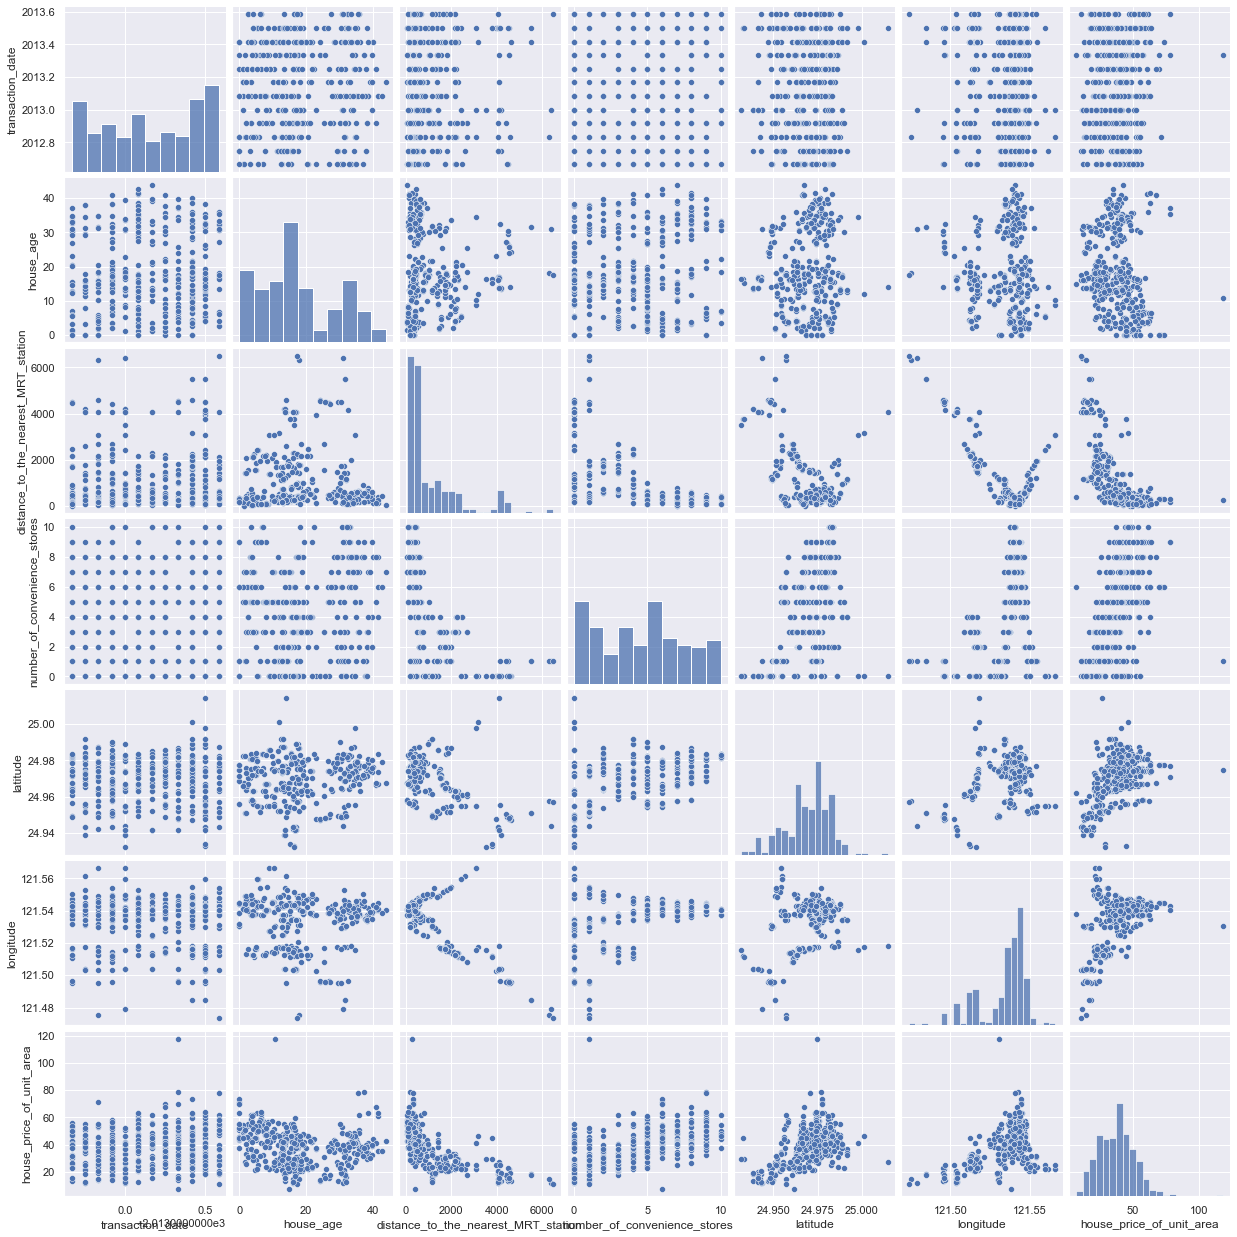

In [10]:
sns.pairplot(data)

* <b>line plot , scatter plot and Pairplot</b> tells us that the Relationship between the independent and dependent variables are <b>Linear</b>
* We can see that There are <b>some outliers</b> in the data,so we need to do some <b>Data Preprocessing</b> 
* Directly using the transaction_date column does not give us much information so for that i had created one function that can easily convert the transactio_date column into 3 columns Day Month and year column.

<AxesSubplot:>

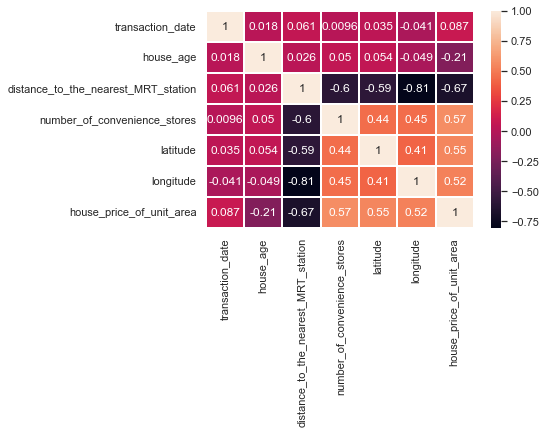

In [11]:
sns.heatmap(data.corr(), annot=True,linewidths=2)

* <b>heatmap</b> tells about the association between the variables.
* we can see that independent variable have some linear relationship with all the dependent variable ,except one transaction_date so we conert that column to day month and year column to use that transaction_date column n the model.

# Feature Engineering
* Plots box plots and remove the ouliers.
* Transformation of the transaction_date column.
* To increase the efficiency of the model we apply Standardisation because we can see the daigoal plots of the pairplots the data is not normal the data is little bit skewed to reduce that we apply Standerdisation.
* check the Multicolinearity in the data.

In [12]:
def to_day_month_year(data):
    # STEP 1: Convert transaction date to day, month and year columns
    # Create date column with `transaction date` as a date
    data['date'] = pd.to_datetime(data['transaction_date'], format='%Y')

    # Create year column
    data['year'] = pd.DatetimeIndex(data['date']).year

    # Create month column by extracting the decimal part of `transaction date` and multiplying it by 12
    data['month'], data['year1'] = data['transaction_date'].apply(lambda x: math.modf(x)).str
    data['month'] = data['month']*12

    # Create day column by extracting the decimal part of int
    data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str

    # Convert month to int
    data['month'] = (data['month']).astype(int)

    # Multiply `day` column by 30 + 1 to convert it to days
    data['day'] = (data['day']*30+1).astype(int)

    # Drop unnecessary columns
    data = data.drop(['transaction_date', 'date', 'year1'], axis=1, inplace=True)
to_day_month_year(data) #Do not Run this line twice 
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_4296\2447019605.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'], data['year1'] = data['transaction_date'].apply(lambda x: math.modf(x)).str
C:\Users\DELL\AppData\Local\Temp\ipykernel_4296\2447019605.py:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str


,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,year,month,day
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,30
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,30
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,0,1
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,8,1
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,3,1
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,0,1


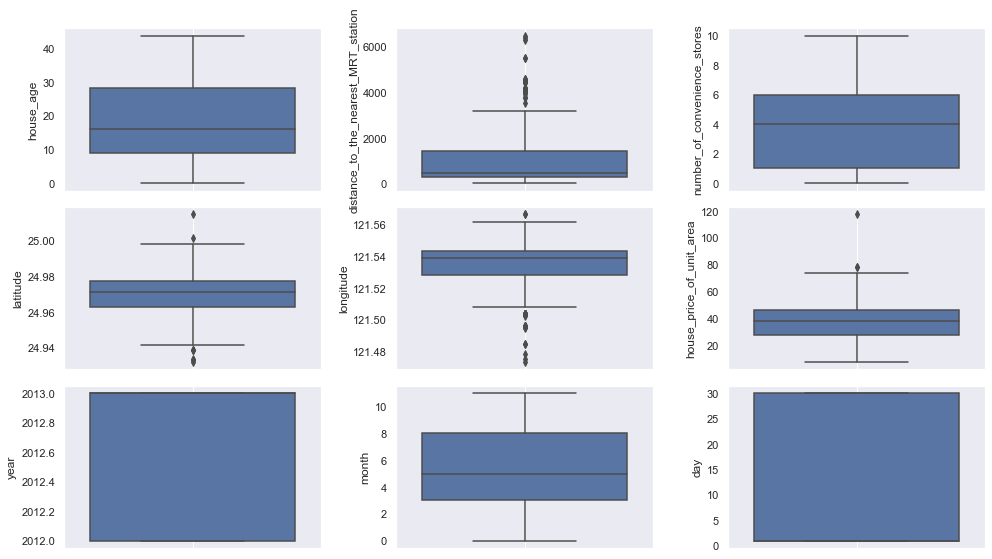

In [13]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(data):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=data)
    plt.grid()
fig.tight_layout(pad=1.0)

In [14]:
data = data[data['house_price_of_unit_area']<80]
data = data[data['distance_to_the_nearest_MRT_station']<3000]
data = data[data['longitude']>121.50]
data.reset_index(drop=True,inplace=True)
#data

In [15]:
x=data.drop('house_price_of_unit_area',axis=1)
y=data['house_price_of_unit_area']

Now we split the data into training and testing data sets.

In [16]:
#library for the Spliting the data sets
from sklearn.model_selection import train_test_split as tts

In [17]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=1)

In [18]:
# Library Required for the Standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
# librares required for the Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.metrics import r2_score as mean_squared_error

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)
print("Intercept",model.intercept_)
print("Coefficients",model.coef_)


Intercept 40.04074074074083
Coefficients [-3.47615215 -6.49285695  2.64836781  2.03254814  0.02756801  2.43166279
  1.44672263  1.17228908]


In [22]:
y_pred=model.predict(x_train)
y_pred1=model.predict(x_test)
print("Training Accuracy : ",r2(y_train,y_pred))
print("Testing Accuracy : ",r2(y_test,y_pred1))

Training Accuracy :  0.644535164375515
Testing Accuracy :  0.5256027237414251


In [23]:
rmse_training_data= np.sqrt(mean_squared_error(y_train, y_pred))
rmse_testing_data= np.sqrt(mean_squared_error(y_train, y_pred))
print("RMSE For Training Data : ",rmse_training_data)
print('RMSE For Testing Data : ',rmse_testing_data)


RMSE For Training Data :  0.8028294740326335
RMSE For Testing Data :  0.8028294740326335


In [24]:
import pickle
with open('realestae.pkl', 'wb') as f:
    pickle.dump(model, f)

By using the above code we created pickle file that contains our trained Linear regression model <br> we can depoly this model in any frame work.

In [26]:
import pickle
with open('realestae.pkl', 'rb') as f:
    model1 = pickle.load(f)
type(model1)
y_predd=model1.predict(x_test)
print("Accuracy Of The Model",r2(y_test,y_predd))

Accuracy Of The Model 0.5256027237414251


By the above lines of code we loaded the model from that pickle file and got the accuracy of the model.

In [28]:
#file=open("lr.pkl","wb")
#pickle.dump(model,file)
#model1=open("lr.pkl","rb")
#lr=pickle.load(model1)
#y_predd=lr,predict(x_test)
#print("Accuracy Of The Model",r2(y_test,y_predd))
# these are the alternative code to build a pckle file and use that ickle file